* Name : Joonyoung-Choi
* Student ID: 20112096
* Description: 
* github: https://github.com/mydream757/Computer_Vision

1. Import libraries

* import needed libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as lin
from matplotlib.image import imread

2. Read data from CSV files

* get ready for using MNIST data

In [2]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

3. Define functions

* the function of data normalizing

In [3]:
# normalize the values of the input data to be [0, 1]
def normalize(data):
    data_normalized = (data - min(data)) / (max(data) - min(data))
    return(data_normalized)

* the function of computing distance

In [4]:
# example of distance function between two vectors x and y
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)
    return(s)

* the function of 'feature funtion'. this returns feature upto max P.

In [5]:
# return the feature function vectors upto Max P
def featureFun(maxP):
    #feature function: numpy.random.normal
    f = np.empty((size_col*size_row,maxP),dtype=float)
    for i in range(maxP):
        f[:,i]=np.random.normal(0,1,size_col*size_row)
    #result = np.dot(f.T,x.T)
    return f

4. Ready for test

* make containers which contain MNIST image data

In [6]:
#make a matrix each column of which represents an images
list_image_train    = np.empty((num_train, size_row * size_col), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((num_test, size_row * size_col), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

* parse the data sets

In [7]:
#parse the data sets
count = 0
for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]    = label
    list_image_train[count,:]  = im_vector

    count += 1

count = 0
for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]    = label
    list_image_test[count,:]  = im_vector

    count += 1

* compute average images of each digits and label 1 or -1

In [8]:
im_average  = np.zeros((10, size_col*size_row), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_train):
    im_average[list_label_train[i],:] += list_image_train[i,:]
    im_count[list_label_train[i]] += 1

im_label = np.zeros((10,1), dtype=float)
for i in range(10):
    im_average[i,:] /= im_count[i]
    #label = 0 : 1, others : -1
    if i==0:
        im_label[0,0] = 1
    else:
        im_label[i,0] = -1

* Ready for test

In [9]:
#Ready for test
experiment_label_test = np.empty(num_test, dtype=int)
experiment_average_test = np.zeros((4,size_row * size_col), dtype=float)
experiment_count_test = np.zeros(4, dtype=int)
result_average_test = np.zeros((4,size_row * size_col), dtype=float)
result_count_test = np.zeros(4, dtype=int)
Final = 0
FinalP = 0
#P can't be over MaxP
maxP = pow(2, 14)
print("MaxP: ",maxP)
#compute feature function of MaxP
f = featureFun(maxP)

MaxP:  16384


5. Test and Find the best p

* find the rough P

In [10]:
#compute coefficient using average image vectors and feature function
for i in range(13):
    print(i,"iteration")
    score = 0
    #initialize containers
    experiment_label_test = np.empty(num_test, dtype=int)
    experiment_average_test = np.zeros((4,size_row * size_col), dtype=float)
    experiment_count_test = np.zeros(4, dtype=int)

    #set different parameter, P
    p = pow(2,i)
    print("P: ",p)
    fx = np.dot(f[:,:p-1].T,im_average.T)
    inverse = lin.pinv(fx.T)
    coefficient = np.dot(inverse, im_label)

    #Evaluate my classifier using MNIST test set
    result = np.dot(np.dot(f[:,:p-1].T, list_image_test.T).T, coefficient)
    num = 0
    for k in range(result.size):
        #sign(f(x))
        if result[k] >= 0:
            experiment_label_test[k] = 1
        else:
            experiment_label_test[k] = -1
        #check TP, FP, TN, FN
        if experiment_label_test[k] == 1 and list_label_test[k] == 0:
            num = 0 #then TP
        elif experiment_label_test[k] == 1 and list_label_test[k] !=0:
            num = 1 #then FP
        elif experiment_label_test[k] == -1 and list_label_test[k] == 0:
            num = 2 #then FN
        elif experiment_label_test[k] == -1 and list_label_test[k] !=0:
            num = 3 #then TN
        experiment_average_test[num,:] += list_image_test[k,:]
        experiment_count_test[num] += 1

    for j in range(4):
        if experiment_count_test[j]!=0:
            experiment_average_test[j, :] /= experiment_count_test[j]

    precision = experiment_count_test[0]*100/(experiment_count_test[0]+experiment_count_test[1])
    recall = experiment_count_test[0]*100/(experiment_count_test[0]+experiment_count_test[2])
    #get the score
    score = (2*precision*recall)/(precision+recall)
    print("score: ",score)
    if score > Final:
        FinalP = p
        Final = score
        result_average_test = experiment_average_test
        result_count_test = experiment_count_test

    print("best score: ",Final)

0 iteration
P:  1
score:  17.85063752276867
best score:  17.85063752276867
1 iteration
P:  2
score:  2.253521126760563
best score:  17.85063752276867
2 iteration
P:  4
score:  4.5668233713901945
best score:  17.85063752276867
3 iteration
P:  8
score:  38.31376734258271
best score:  38.31376734258271
4 iteration
P:  16
score:  41.00440072482527
best score:  41.00440072482527
5 iteration
P:  32
score:  61.00037608123354
best score:  61.00037608123354
6 iteration
P:  64
score:  67.49072929542646
best score:  67.49072929542646
7 iteration
P:  128
score:  72.38014425116674
best score:  72.38014425116674
8 iteration
P:  256
score:  74.39024390243904
best score:  74.39024390243904
9 iteration
P:  512
score:  75.79225352112677
best score:  75.79225352112677
10 iteration
P:  1024
score:  75.92592592592591
best score:  75.92592592592591
11 iteration
P:  2048
score:  76.11159546643417
best score:  76.11159546643417
12 iteration
P:  4096
score:  76.09457092819615
best score:  76.11159546643417


* vary parameter p with standard deviation = 1

In [11]:
#varing p with standard deviation = 1
k=0
incremental = 1
p = FinalP
stopChecker = 0
for r in range(100):
    print(r," iteration")
    #set different parameter, P
    p = p + incremental
    score = 0
    #initialize containers
    experiment_label_test = np.empty(num_test, dtype=int)
    experiment_average_test = np.zeros((4,size_row * size_col), dtype=float)
    experiment_count_test = np.zeros(4, dtype=int)

    print("P: ",p)
    fx = np.dot(f[:,:p-1].T,im_average.T)
    inverse = lin.pinv(fx.T)
    coefficient = np.dot(inverse, im_label)

    #Evaluate my classifier using MNIST test set
    result = np.dot(np.dot(f[:,:p-1].T, list_image_test.T).T, coefficient)
    num = 0
    for k in range(result.size):
        #sign(f(x))
        if result[k] >= 0:
            experiment_label_test[k] = 1
        else:
            experiment_label_test[k] = -1
        #check TP, FP, TN, FN
        if experiment_label_test[k] == 1 and list_label_test[k] == 0:
            num = 0 #then TP
        elif experiment_label_test[k] == 1 and list_label_test[k] !=0:
            num = 1 #then FP
        elif experiment_label_test[k] == -1 and list_label_test[k] == 0:
            num = 2 #then FN
        elif experiment_label_test[k] == -1 and list_label_test[k] !=0:
            num = 3 #then TN
        experiment_average_test[num,:] += list_image_test[k,:]
        experiment_count_test[num] += 1

    for j in range(4):
        experiment_average_test[j, :] /= experiment_count_test[j]
    precision = experiment_count_test[0]*100/(experiment_count_test[0]+experiment_count_test[1])
    recall = experiment_count_test[0]*100/(experiment_count_test[0]+experiment_count_test[2])
    #get the score
    score = (2*precision*recall)/(precision+recall)
    print("score: ",score)
    if Final == score:
        stopChecker += 1

    elif score > Final:
        FinalP = p
        Final = score
        result_average_test = experiment_average_test
        result_count_test = experiment_count_test
    #change incremental direction
    elif Final>score:
        incremental *= -1
    print("best score: ",Final)

    #loop stop condition
    if stopChecker == 3:
        break
        
print("P of the best score: ",FinalP)
print("The best score(F1): ",Final)

0  iteration
P:  2049
score:  76.11159546643417
best score:  76.11159546643417
1  iteration
P:  2050
score:  76.15720524017469
best score:  76.15720524017469
2  iteration
P:  2051
score:  76.09075043630017
best score:  76.15720524017469
3  iteration
P:  2050
score:  76.15720524017469
best score:  76.15720524017469
4  iteration
P:  2049
score:  76.11159546643417
best score:  76.15720524017469
5  iteration
P:  2050
score:  76.15720524017469
best score:  76.15720524017469
P of the best score:  2050
The best score(F1):  76.15720524017469


* plot the TP,FP,FN,TN

TP :  872
FP :  438
FN :  108
TN :  8582


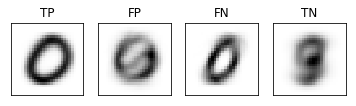

In [12]:
#plot the TP,FP,TN,FN
plt.figure()
for i in range(4):
    result_average_test[i, :] /= result_count_test[i]
    title = ['TP','FP','FN','TN']
    plt.subplot(1, 4, i+1)
    plt.title(title[i])
    plt.imshow(result_average_test[i,:].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

    print(title[i],': ',result_count_test[i])
plt.show()